# Import Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

# Import Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 6\CarPrice_Assignment.csv')
dataset.head()

,car_ID,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset.describe(include ='all')

,car_ID,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205.000000,205.000000,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,5,3,2,NaN,NaN,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corona,gas,std,sedan,fwd,front,NaN,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,96,120,202,NaN,NaN,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


## Data Preprocessing

In [4]:
dataset.columns

Index(['car_ID', 'CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
# Beacuse car_id and Car name do not make any sense in order to detect price, so I removed them in advance.
dataset2 = dataset.drop(['car_ID','CarName'], axis = 1)
dataset2.head(2)

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [6]:
dataset2.isnull().sum()
#There is no missing value

fueltype            0
aspiration          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

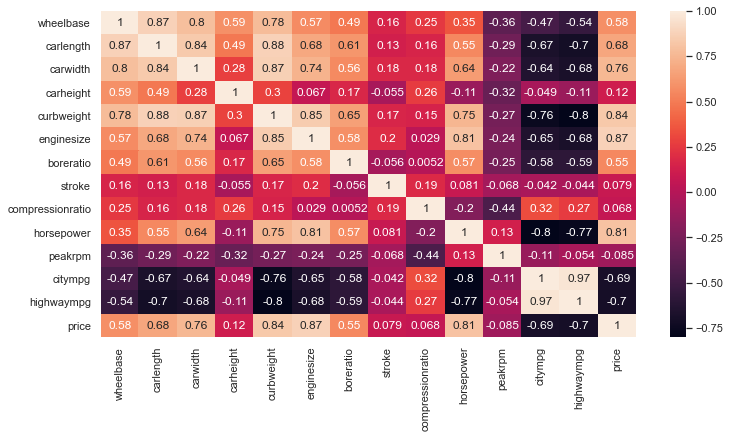

In [7]:
# In order discover and quantify correlation degree between independent numerical and dependent variables
plt.figure(figsize = (12,6))
sns.heatmap(dataset2.corr(), annot =True)

In [8]:
# get correlations
df_corr = dataset2.corr()
df_corr['price']

wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [9]:
# I took the columns correlated with Price where the correlation is more than 60 and eliminated the rest.
dataset_corr = dataset2.drop(['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm'], axis = 1)

In [10]:
# Checking datatypes
dataset_corr.dtypes
# Numerical columns are int or float type, so no need to conversion from object to numerical.

fueltype           object
aspiration         object
carbody            object
drivewheel         object
enginelocation     object
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
fuelsystem         object
horsepower          int64
citympg             int64
highwaympg          int64
price             float64
dtype: object

# Outlier Treatment

<AxesSubplot:xlabel='price', ylabel='Density'>

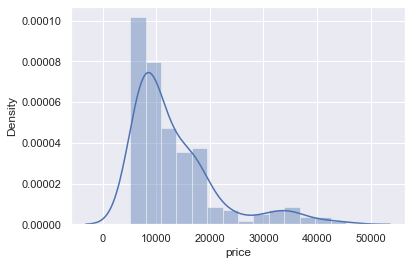

In [11]:
import warnings
warnings.filterwarnings('ignore')
# Dependent variable is Price
sns.distplot(dataset_corr['price'])

<AxesSubplot:xlabel='price'>

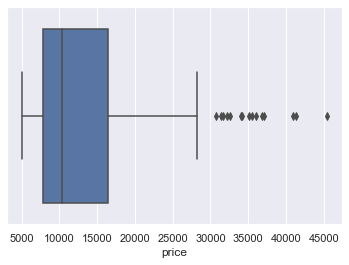

In [12]:
sns.boxplot(dataset_corr['price'])

In [13]:
q = dataset_corr['price'].quantile(0.92)
data_1 = dataset_corr[dataset_corr['price']<q]

<AxesSubplot:xlabel='price'>

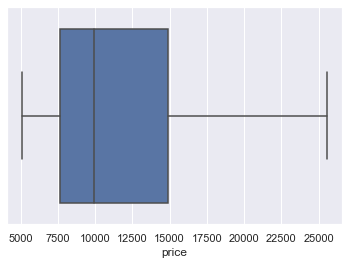

In [14]:
sns.boxplot(data_1['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

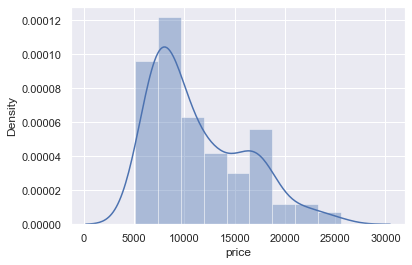

In [15]:
sns.distplot(data_1['price'])

I started to plot data distribution of (carlength, carwidth, curbweight, horsepower, enginesize, citympg and highwaympg numerical cols) against the density distribution.

<AxesSubplot:xlabel='carlength', ylabel='Density'>

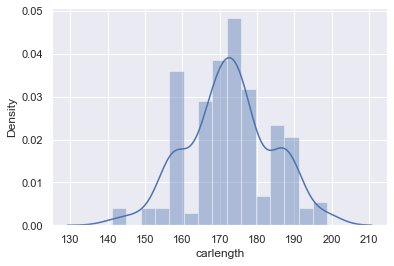

In [16]:
sns.distplot(data_1['carlength'])

<AxesSubplot:xlabel='carlength'>

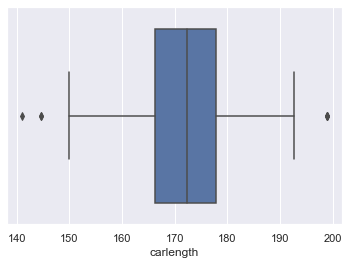

In [17]:
sns.boxplot(data_1['carlength'])

In [18]:
qtl = data_1['carlength'].quantile(0.08)
data_2 = data_1[data_1['carlength']>qtl]

<AxesSubplot:xlabel='carlength'>

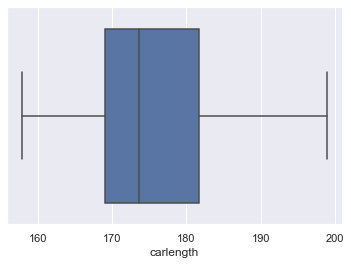

In [19]:
sns.boxplot(data_2['carlength'])

<AxesSubplot:xlabel='carwidth'>

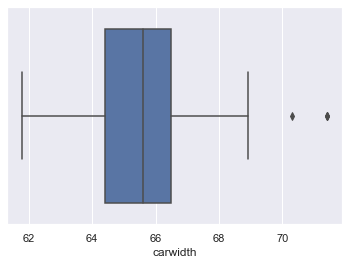

In [20]:
sns.boxplot(data_2['carwidth'])

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

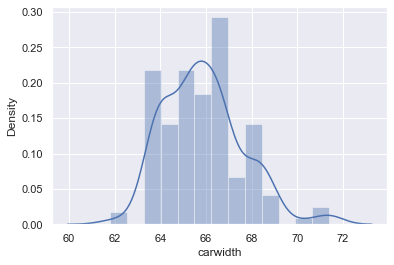

In [21]:
sns.distplot(data_2['carwidth'])

In [22]:
qtl = data_2['carwidth'].quantile(0.98)
data_3 = data_2[data_2['carwidth']<qtl]

<AxesSubplot:xlabel='carwidth'>

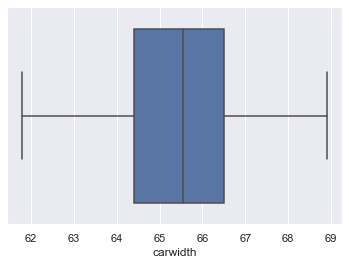

In [23]:
sns.boxplot(data_3['carwidth'])

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

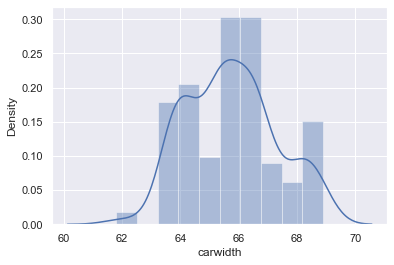

In [24]:
sns.distplot(data_3['carwidth'])

<AxesSubplot:xlabel='enginesize'>

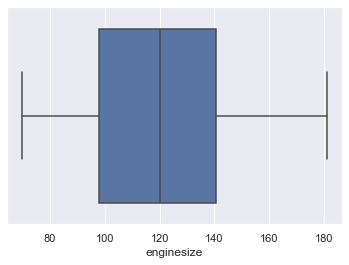

In [25]:
sns.boxplot(data_3['enginesize'])

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

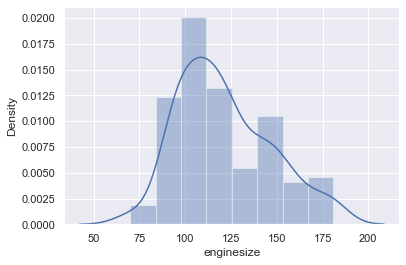

In [26]:
sns.distplot(data_3['enginesize'])

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

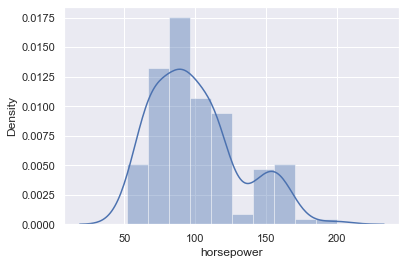

In [27]:
sns.distplot(data_3['horsepower'])

<AxesSubplot:xlabel='horsepower'>

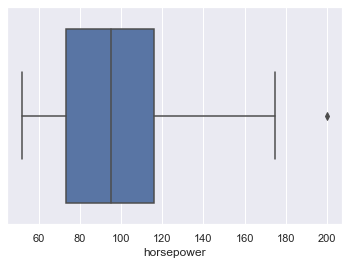

In [28]:
sns.boxplot(data_3['horsepower'])

In [29]:
qtl = data_3['horsepower'].quantile(0.97)
data_4 = data_3[data_3['horsepower'] < qtl]

<AxesSubplot:xlabel='horsepower'>

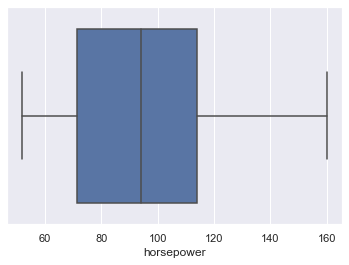

In [30]:
sns.boxplot(data_4['horsepower'])

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

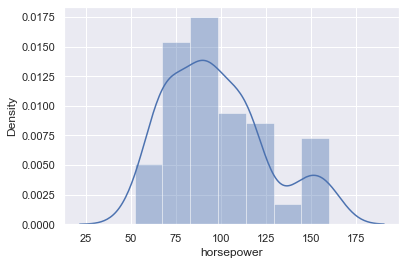

In [31]:
sns.distplot(data_4['horsepower'])

<AxesSubplot:xlabel='citympg', ylabel='Density'>

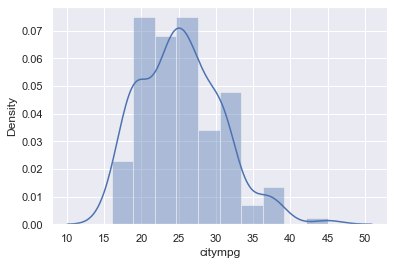

In [32]:
sns.distplot(data_4['citympg'])

<AxesSubplot:xlabel='citympg'>

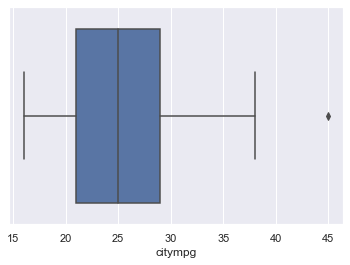

In [33]:
sns.boxplot(data_4['citympg'])

In [34]:
qtl = data_4['citympg'].quantile(0.99)
data_5 = data_4[data_4['citympg'] < qtl]

<AxesSubplot:xlabel='citympg'>

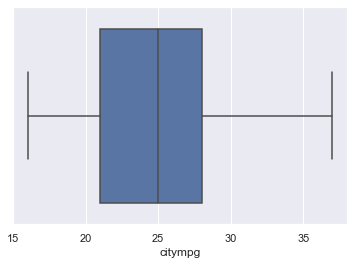

In [35]:
sns.boxplot(data_5['citympg'])

<AxesSubplot:xlabel='citympg', ylabel='Density'>

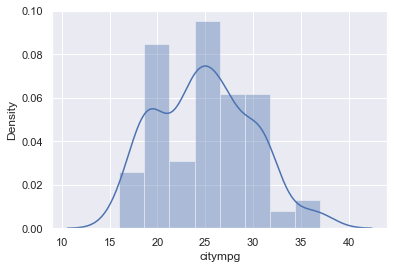

In [36]:
sns.distplot(data_5['citympg'])

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

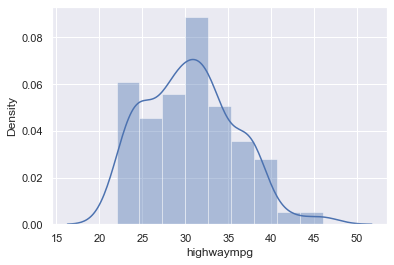

In [37]:
sns.distplot(data_5['highwaympg'])

<AxesSubplot:xlabel='highwaympg'>

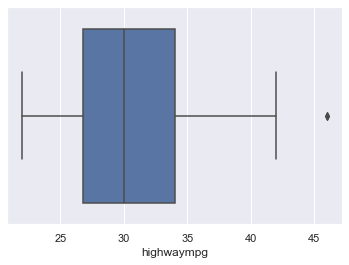

In [38]:
sns.boxplot(data_5['highwaympg'])

In [39]:
qtl = data_5['highwaympg'].quantile(0.99)
data_6 = data_5[data_5['highwaympg'] < qtl]

<AxesSubplot:xlabel='highwaympg'>

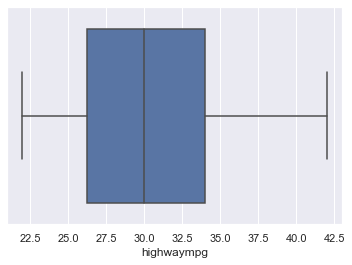

In [40]:
sns.boxplot(data_6['highwaympg'])

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

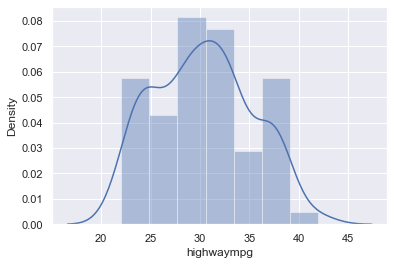

In [41]:
sns.distplot(data_6['highwaympg'])

In [42]:
data_cleaned = data_6.reset_index(drop=True)
data_cleaned.describe()

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,175.147260,65.723973,2532.431507,120.931507,99.034247,24.773973,30.356164,11759.131281
std,8.852774,1.518906,390.873221,24.734635,27.096612,4.726697,4.887337,4318.430662
min,157.900000,61.800000,1889.000000,70.000000,56.000000,16.000000,22.000000,5195.000000
25%,169.000000,64.400000,2276.250000,100.500000,79.000000,21.000000,26.250000,8240.750000
50%,173.500000,65.550000,2434.000000,120.000000,95.000000,24.500000,30.000000,10646.500000
75%,178.425000,66.500000,2821.750000,140.750000,114.000000,28.000000,34.000000,14997.250000
max,198.900000,68.900000,3485.000000,181.000000,160.000000,37.000000,42.000000,24565.000000


## OLS assumptions

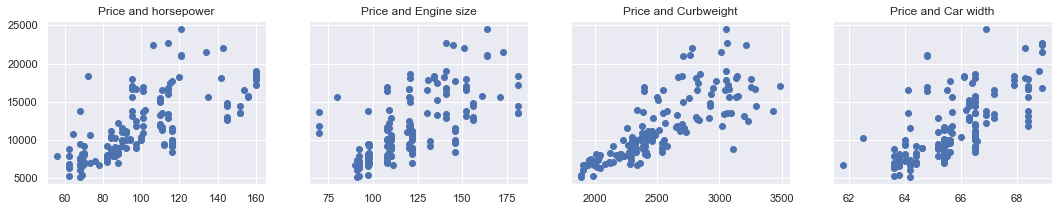

In [43]:
f, (axis1, axis2, axis3, axis4) = plt.subplots(1, 4, sharey=True, figsize =(18,3)) 
axis1.scatter(data_cleaned['horsepower'],data_cleaned['price'])
axis1.set_title('Price and horsepower')
axis2.scatter(data_cleaned['enginesize'],data_cleaned['price'])
axis2.set_title('Price and Engine size')
axis3.scatter(data_cleaned['curbweight'],data_cleaned['price'])
axis3.set_title('Price and Curbweight')
axis4.scatter(data_cleaned['carwidth'],data_cleaned['price'])
axis4.set_title('Price and Car width')
plt.show()

In [44]:
# I suppose it has already some linear regression between them, but I made log transformation for a better result
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price
data_cleaned.iloc[:, 15:].head(5)

,price,log_price
0,13495.0,9.510075
1,16500.0,9.711116
2,16500.0,9.711116
3,13950.0,9.543235
4,17450.0,9.767095


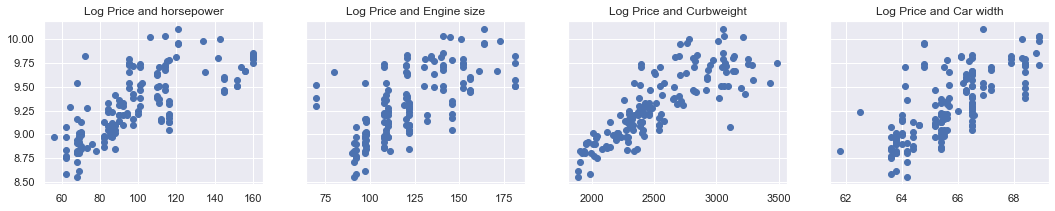

In [45]:
f, (axis1, axis2, axis3, axis4) = plt.subplots(1, 4, sharey=True, figsize =(18,3)) 
axis1.scatter(data_cleaned['horsepower'],data_cleaned['log_price'])
axis1.set_title('Log Price and horsepower')
axis2.scatter(data_cleaned['enginesize'],data_cleaned['log_price'])
axis2.set_title('Log Price and Engine size')
axis3.scatter(data_cleaned['curbweight'],data_cleaned['log_price'])
axis3.set_title('Log Price and Curbweight')
axis4.scatter(data_cleaned['carwidth'],data_cleaned['log_price'])
axis4.set_title('Log Price and Car width')
plt.show()
# Big difference is not observed

In [46]:
data_cleaned = data_cleaned.drop(['price'],axis=1)

In [47]:
# checking correlation with log_price
df_corr2 = data_cleaned.corr()
df_corr2['log_price']

carlength     0.693314
carwidth      0.719898
curbweight    0.821672
enginesize    0.666049
horsepower    0.727634
citympg      -0.703887
highwaympg   -0.703209
log_price     1.000000
Name: log_price, dtype: float64

## Multicollinearity

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# most correlated numerical cols with log_price
variables = data_cleaned[['carlength','carwidth','curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
4,horsepower,72.758594
3,enginesize,89.663147
2,curbweight,309.132293
5,citympg,388.152297
6,highwaympg,525.990440
1,carwidth,1715.837196
0,carlength,1769.696947


In [49]:
# I am a bit confused with the result, because they all are larger than 5 or 7.
# But I decided to take only 'enginesize','horsepower' and drop others from the set

In [50]:
data_cleaned.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg',
       'log_price'],
      dtype='object')

In [51]:
data_no_multicol = data_cleaned.drop(['carlength', 'carwidth', 'citympg', 'highwaympg', 'curbweight'],axis=1)
data_no_multicol.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'horsepower', 'log_price'],
      dtype='object')

## Dummy variables 

In [52]:
# Now time to work with categorical variables and encode them
data_with_dummies = pd.get_dummies(data_no_multicol, drop_first=True)
# Firstly I dropped some categorical cols like cylinder numbers and engine location 
# but I saw in final result it affected a little bit to Accuracy so I restored it.

In [53]:
data_with_dummies.tail()

,enginesize,horsepower,log_price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,...,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
141,141,114,9.731809,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
142,141,160,9.854560,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
143,173,134,9.975110,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
144,145,106,10.019936,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
145,141,114,10.026811,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# Multiple Linear Regression model

In [54]:
to_predict = data_with_dummies['log_price']
inputs = data_with_dummies.drop(['log_price'],axis=1)
inputs.head()

,enginesize,horsepower,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,130,111,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,130,111,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,152,154,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,109,102,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,136,115,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [56]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 0.36789344,  0.44311605,  0.2992528 , ...,  1.05638157,
        -0.2244097 , -0.08304548],
       [ 0.36789344,  0.44311605,  0.2992528 , ...,  1.05638157,
        -0.2244097 , -0.08304548],
       [ 1.26039627,  2.035493  ,  0.2992528 , ...,  1.05638157,
        -0.2244097 , -0.08304548],
       ...,
       [ 2.11233079,  1.29485255,  0.2992528 , ...,  1.05638157,
        -0.2244097 , -0.08304548],
       [ 0.9764181 ,  0.25795593, -3.34165628, ..., -0.94662764,
        -0.2244097 , -0.08304548],
       [ 0.81414486,  0.55421211,  0.2992528 , ...,  1.05638157,
        -0.2244097 , -0.08304548]])

## Train and Test splitting

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, to_predict, test_size=0.2, random_state= 42)

In [58]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred_train = reg.predict(x_train)

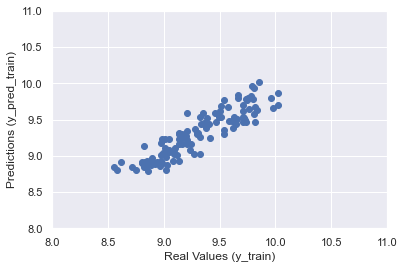

In [60]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Real Values (y_train)',size=12)
plt.ylabel('Predictions (y_pred_train)',size=12)
plt.xlim(8,11)
plt.ylim(8,11)
plt.show()
# Linear relationship (function of y=x) is detected between real value and predicted value of train data set

In [61]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.8190319832401577

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,enginesize,0.056530
1,horsepower,0.187221
2,fueltype_gas,-0.042784
3,aspiration_turbo,0.026050
4,carbody_hardtop,-0.047586
5,carbody_hatchback,-0.107131
6,carbody_sedan,-0.088102
7,carbody_wagon,-0.067521
8,drivewheel_fwd,-0.038424
9,drivewheel_rwd,0.018301


In [63]:
# Prediction of Test dataset
y_pred_test = reg.predict(x_test)

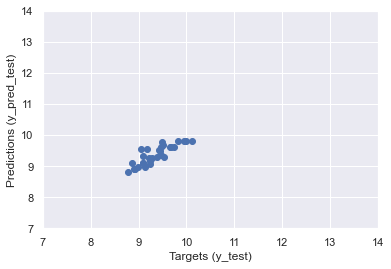

In [64]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Targets (y_test)',size=12)
plt.ylabel('Predictions (y_pred_test)',size=12)
plt.xlim(7,14)
plt.ylim(7,14)
plt.show()
# Linear relationship between test data and predicted test data

In [65]:
# Find the R-squared of the model
reg.score(x_test,y_test)

0.7315649477418307

In [66]:
df_pf = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Real_Val'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Real_Val'] - df_pf['Prediction']
pd.set_option('precision', 2)
df_pf.head(10)

,Prediction,Real_Val,Residual
0,9031.79,6989.0,-2042.79
1,7850.75,8013.0,162.25
2,7322.81,7395.0,72.19
3,11495.77,12945.0,1449.23
4,13092.80,12629.0,-463.80
5,11101.72,8948.0,-2153.72
6,10945.00,11845.0,900.00
7,17925.77,22018.0,4092.23
8,17855.00,13200.0,-4655.00
9,8728.02,10295.0,1566.98


# Random Forest Regression

In [67]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(inputs, to_predict, test_size= 0.2, random_state= 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(x_train1, y_train1)

RandomForestRegressor(random_state=42)

In [69]:
predictions = reg.predict(x_test1)
errors = abs(predictions - y_test1)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.17


In [70]:
# Mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test1)
accuracy = 100 - np.mean(mape)
print('Accuracy is ', round(accuracy, 2), '%.')


Accuracy is  98.21 %.


In [71]:
df = pd.DataFrame({'Real Values': y_test1, 'Predicted Values': predictions})
df.head()

,Real Values,Predicted Values
45,8.85,9.05
97,8.99,8.95
27,8.91,8.79
19,9.47,9.35
42,9.44,9.58


In [72]:
# I checked accuracy after conversion from log tranformation to exponential tranformation
predictions = np.exp(predictions)
errors = abs(predictions - np.exp(y_test1))
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2165.47


In [73]:
mape = 100 * (errors / np.exp(y_test1))
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
# After exponential transformation accuracy result decreased.

Accuracy: 83.04 %.


In [74]:
df_final = pd.DataFrame({'Real Values': np.exp(y_test1), 'MLR': np.exp(y_pred_test), 'RF': predictions})
df_final['Residual_MLR'] = df_final['Real Values'] - df_final['MLR']
df_final['Residual_RF'] = df_final['Real Values'] - df_final['RF']
pd.set_option('precision', 2)
df_final

,Real Values,MLR,RF,Residual_MLR,Residual_RF
45,6989.0,9031.79,8487.68,-2042.79,-1498.68
97,8013.0,7850.75,7672.64,162.25,340.36
27,7395.0,7322.81,6552.14,72.19,842.86
19,12945.0,11495.77,11468.39,1449.23,1476.61
42,12629.0,13092.80,14486.95,-463.80,-1857.95
120,8948.0,11101.72,11145.40,-2153.72,-2197.40
29,11845.0,10945.00,11578.55,900.00,266.45
80,22018.0,17925.77,12521.40,4092.23,9496.60
66,13200.0,17855.00,17608.52,-4655.00,-4408.52
18,10295.0,8728.02,8648.08,1566.98,1646.92


It seems RF shows better result than MLR